In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns #시각화 라이브러리

### 목표
- 타이타닉 데이터를 학습해서 생존자/사망자 예측하기
- 머신러닝 전체과정을 정리해보자

### 머신러닝 과정
- 1. 문제정의
- 2. 데이터 수집
- 3. 데이터 전처리
- 4. 탐색적 데이터분석(EDA)
- 5. 모델 선택 및 하이퍼파라미터 조정
- 6. 모델 학습
- 7. 모델 평가
- 8. 서비스화(Web)

### 1. 문제 정의
- 탑승객의 정보를 바탕으로 생존자/사망자 분류(지도학습,분류)
- kaggle에서 좋은 점수 받기

### 2. 데이터 수집
- kaggle 사이트로부터 train,test,gender_submission 다운로드

In [3]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3. 데이터 전처리
- 컬럼 삭제
- 결측치 채우기
(1.데이터 삭제, 2.기술 통계&상관계수를 통한 대체값, 3. 머신러닝을 활용한 결측치 예측)
- 새로운 컬럼 만들기
- 범주형 데이터로 바꾸기
- 모든 컬럼 수치화

In [6]:
#passengerId 삭제 필요없는 데이터
train.drop('PassengerId',axis=1,inplace=True)
#axis를 0으로 하면 행 삭제,inplace true 원래 값 변화

In [7]:
test.drop('PassengerId',axis=1,inplace=True)

In [8]:
y_train=train['Survived']

In [9]:
#결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


##### embarked의 결측치 채우기

In [10]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train.describe(include='all')#include=all을 활성화 하면 더 자세하게 내용을 볼수 있다.


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Attalah, Mr. Sleiman",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
#fillna 사용
#embarked 속성 결측치 'S'값으로 채우기
train['Embarked'].fillna('S',inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [15]:
#test에서 Fare결측치 채우기
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
test['Fare'].fillna(14.454200,inplace=True)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [18]:
#age 칼럼채우기
#특성간의 상관관계를 통해서 채우기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [19]:
train.corr()
#Pclass와 가장 상관관계가 높으므로 그것과 연계하여 결측치를 채워보자

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [20]:
train[['Pclass','Age']].groupby(by='Pclass').median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [21]:
#성별도 연관이 많기 때문에 성별도 추가하자
train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).median()

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [22]:
train[['Pclass','Sex','Age']].groupby(by=['Sex','Pclass']).median()

Age
Sex    Pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [23]:
age_table=train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).median()

In [24]:
age_table.loc[(2,'female'),'Age']

28.0

In [25]:
#index로만으로 소환
age_table.loc[3,'male']

Age    25.0
Name: (3, male), dtype: float64

In [26]:
def fill_age(person):
    if np.isnan(person['Age']):
        return age_table.loc[person['Pclass'],person['Sex']][0]
    else:
        return person['Age']

In [27]:
train['Age']=train.apply(fill_age,axis=1)
test['Age']=test.apply(fill_age,axis=1)
#apply함수는 for문과 비슷하게 생각하면 된다.반복 기능을 편하게 사용목적
#예시,apply(np.max())하면 행이나 열의 최댓값 구함
#가장 큰 메리트는 사용자 함수를 사용할 수 있다는 것

In [28]:
display(train.info())
display(test.info())
#print없이 바로 보고 싶을때

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


None

#### Cabin 채우기
- 결측치를 하나의 데이터로 활용해보자
- Cabin 범주가 너무 많기 때문에 종류를 줄여보자(모델이 복잡해지는 것 방지: 과대적합 방지)

In [29]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [30]:
#고유값들만 뽑아보자
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
train['Cabin'].str[0]
#train['Cabin'].str -> 그 컬럼의 각각의 문자를 나타냄

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [32]:
train['Cabin']=train['Cabin'].str[0]

In [33]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [34]:
#위에 없는 문자로 nan값을 채워보자
train['Cabin'].fillna('M',inplace=True)

In [35]:
test['Cabin'].str[0]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin, Length: 418, dtype: object

In [36]:
test['Cabin']=test['Cabin'].str[0]

In [37]:
test['Cabin'].fillna('M',inplace=True)

In [38]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


None

In [39]:
#mapping
#값을 하나하나 바꿔주는 것
#male=1 female=2
#1. loc인덱서를 통해 'Sex'칼럼 불러오기
#train.loc[:,'Sex']
train['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [40]:
#2.1번 데이터에서 male값만 불러오기
train['Sex'][train.loc[:,'Sex']=='male']

0      male
4      male
5      male
6      male
7      male
       ... 
883    male
884    male
886    male
889    male
890    male
Name: Sex, Length: 577, dtype: object

### 4. 탐색적 데이터 분석(EDA)
- train 데이터를 이용해 탐색을 한다.

In [41]:
#탐색은 주로 훈련용 데이터를 쓰는 게 좋다
#test데이터로 분석하는 건 답지 미리 보는 거라 모델성능 확인이 어렵다

#### 범주형 데이터 시각화
- 빈도 기반의 bar chart를 많이 활용

In [42]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


#### Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

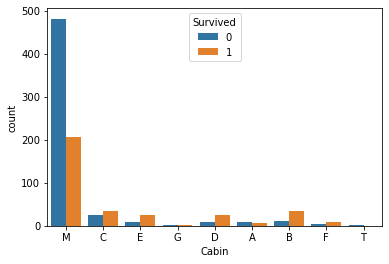

In [43]:
sns.countplot(data=train,x='Cabin',
             hue='Survived')#hue로 지정을 해주면 각 값들을 hue 기준으로 나눠줌

- M에서 상대적으로 많은 사람이 죽었다. 모델에게 학습시켜도 의미가 있을 수도 있겠다.

#### Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

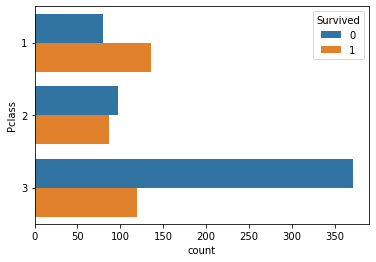

In [44]:
sns.countplot(data=train,y='Pclass',hue='Survived')

- 1등급에 탑승하면 살 확률이 조금 있다.
- 3등급에 탑승하면 죽을 확률이 높다.
- Pclass를 모델에게 사용해도 괜찮을 것 같다.

#### Pclass와 Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

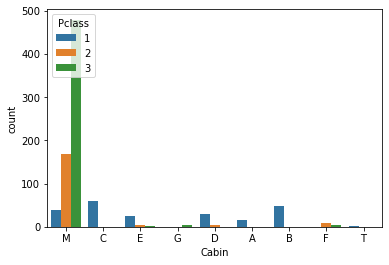

In [45]:
sns.countplot(data=train,x='Cabin',hue='Pclass')

- A,B,C는 1등급 사람들이 탔다.
- M은 3등급 사람들이 많이 탑승했다. -> 3등급 사람이 많이 죽어서 정보가 손실?

#### Embarked, Sex 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

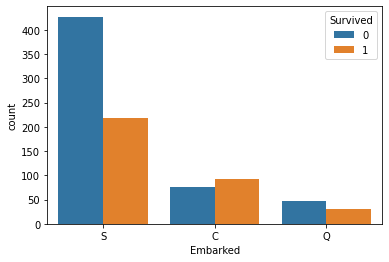

In [46]:
sns.countplot(data=train,x='Embarked',hue='Survived')

- S항구에서 승선한 승객이 더 많이 죽었다.
- S항구에서 많은 승객이 탑승했다.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

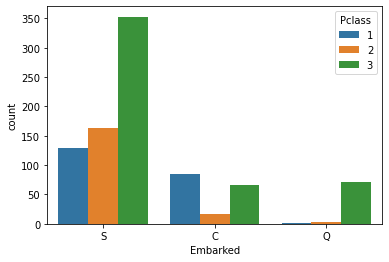

In [47]:
sns.countplot(data=train,x='Embarked',hue='Pclass')

- S선착장에서 3등급 분들이 많이 탑승했기 때문에 의미가 별로 없을 수도 있다.

<AxesSubplot:xlabel='Sex', ylabel='count'>

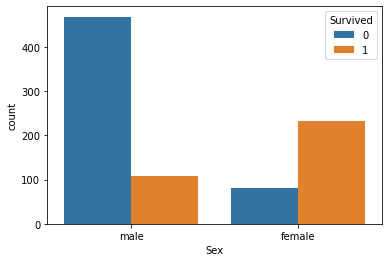

In [48]:
sns.countplot(data=train,x='Sex',hue='Survived')

- 남성이 여성보다 더 많은 인원이 있었다.
- 남성이 여성보다 죽을 확률이 높다.

<AxesSubplot:xlabel='Sex', ylabel='count'>

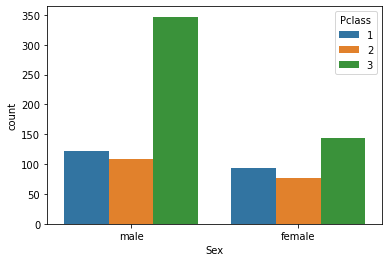

In [49]:
sns.countplot(data=train,x='Sex',hue='Pclass')

#### 수치형 데이터
- 구간을 나눠서 종합하는 히스토그램
- 커널밀도추정 그래프

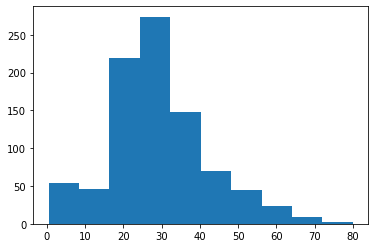

In [50]:
plt.hist(train['Age'])
plt.show()

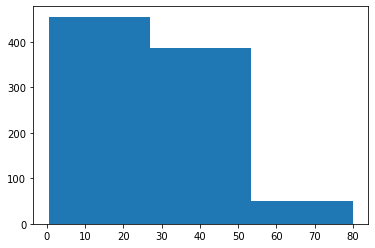

In [51]:
plt.hist(train['Age'],bins=3)
plt.show()
#구간 설정을 잘못하면 데이터 파악이 이상해 질수 있음

#### Age 시각화

<AxesSubplot:xlabel='Sex', ylabel='Age'>

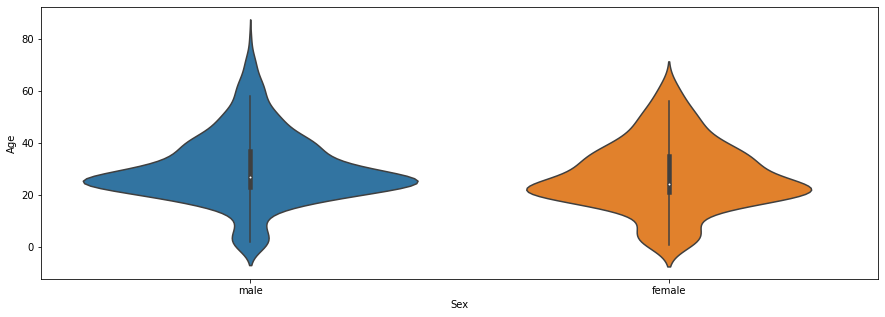

In [52]:
#커널밀도추정 그래프 ->밀도가 높은 구간은 높게 낮은 구간은 낮게 표현
plt.figure(figsize=(15,5))
sns.violinplot(data=train, y='Age',x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

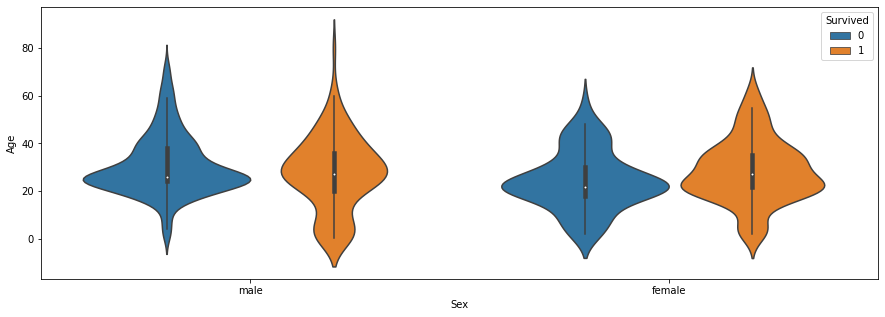

In [53]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train, y='Age',x='Sex',hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

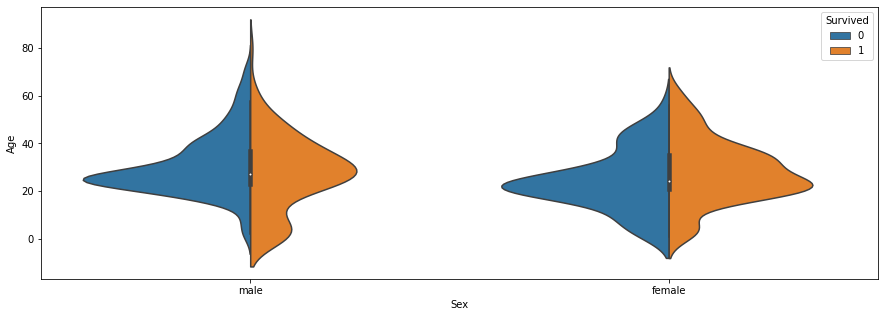

In [54]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train, y='Age',x='Sex',hue='Survived',split=True)

- 남자는 20대가 약간 많이 사망
- 어린아이 중에서는 남자아이가 여자아이에 비해서 많이 살았다.(시대적 배경 추측)

Fare 시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

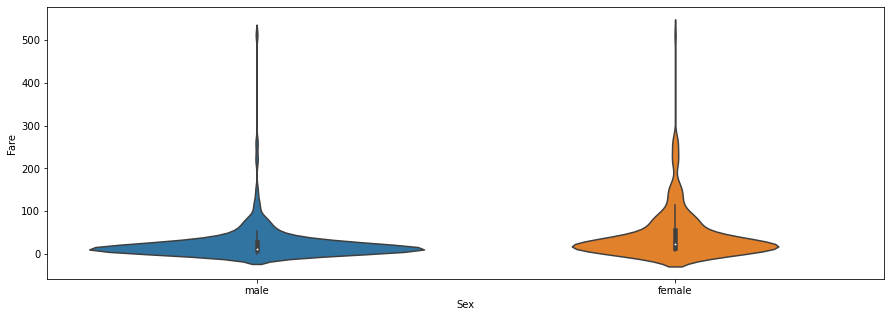

In [55]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train, y='Fare',x='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

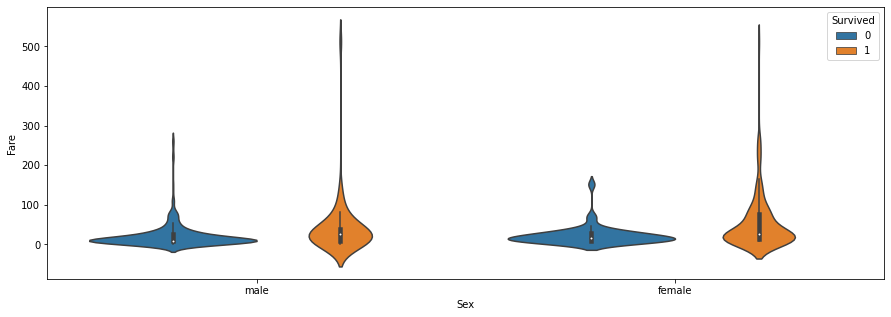

In [56]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train, y='Fare',x='Sex',hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

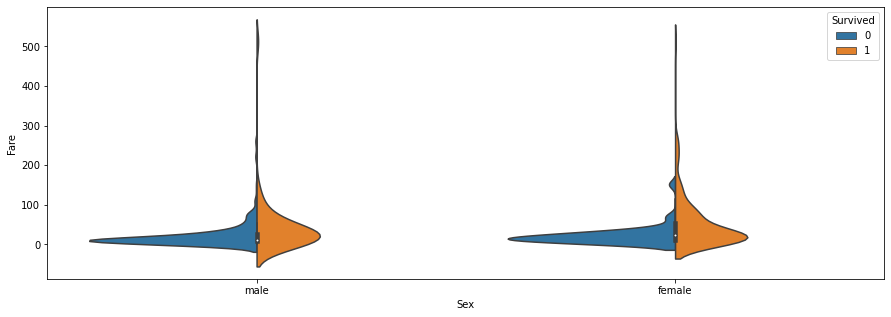

In [57]:
plt.figure(figsize=(15,5))
sns.violinplot(data=train, y='Fare',x='Sex',hue='Survived',split=True)

- 요금이 싼 사람들은 상대적으로 많이 죽었다.
- 전체 요금이 0~40달러 사이에 많이 분포되어 있다.

#### 특성공학
- SibSp와 Parch를 합쳐서 가족이라는 새로운 컬럼 생성

In [58]:
train['Family_Size']=train['SibSp']+train['Parch']+1#나를 포함 한다 하면 +1
test['Family_Size']=test['SibSp']+test['Parch']+1

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

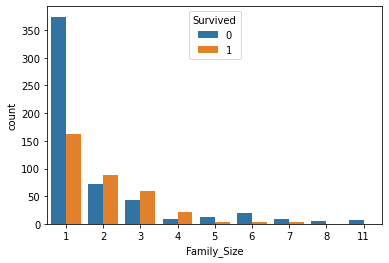

In [59]:
sns.countplot(data=train,x='Family_Size',hue='Survived')

- 1명 일 때는 죽은 비율이 높다.
- 2~4명 일 때는 산 비율이 높다.
- 5명 이상일 때는 죽은 비율이 높다.
- Family_Size라는 수치데이터를 그대로 써도 좋지만 범주형 데이터로 변환해보자
- (Binning(수치형->범주형) : 사소한 관찰 오류를 줄여준다.(모델의 단순화 유도)

#### 특성공학
- 가족사이즈가 1이면 Alone,2~4이면 Small,5명 이상이면 Large 범주로 변경하자
- cut 함수 활용

In [60]:
bins=[0,1,4,20]
lb=["Alone","Small","Large"]

In [61]:
pd.cut(x=train['Family_Size'],bins=bins,labels=lb)

0      Small
1      Small
2      Alone
3      Small
4      Alone
       ...  
886    Alone
887    Alone
888    Small
889    Alone
890    Alone
Name: Family_Size, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [62]:
train['Family_Group']=pd.cut(x=train['Family_Size'],bins=bins,labels=lb)

In [63]:
test['Family_Group']=pd.cut(x=test['Family_Size'],bins=bins,labels=lb)

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

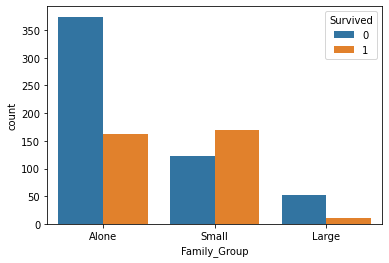

In [64]:
sns.countplot(data=train,x='Family_Group',hue='Survived')

#### 특성공학
- text 데이터 다루기(비정형 데이터)
- Name 컬럼 : 중간에 호칭을 뽑아서 정형화 시키자(Miss,Mr,Mrs)

In [65]:
train['Name'] #Series타입의 데이터

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [66]:
def split_title(row):
    #pass #조건문 쓸때 빈칸이면 오류나는데 pass쓰면 오류 안나게됨
    return row.split(',')[1].split('.')[0].strip()#strip()문장 앞뒤의 공백 없애기

In [67]:
train['Name'].apply(split_title) #->series타입이라 axis설정 안해줘도 된다.

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [68]:
train['Title']=train['Name'].apply(split_title)
test['Title']=test['Name'].apply(split_title)

In [69]:
#정형화된 Title 종류 확인해보기
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

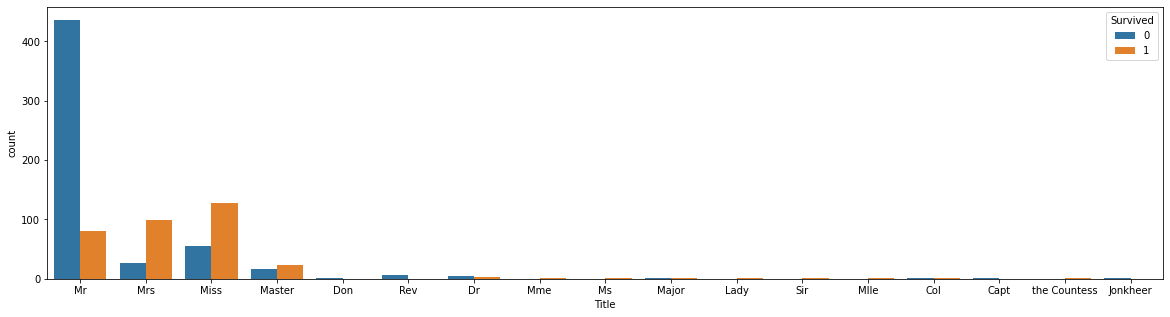

In [70]:
plt.figure(figsize=(20,5))
sns.countplot(data=train,x='Title',hue='Survived')

(0.0, 20.0)

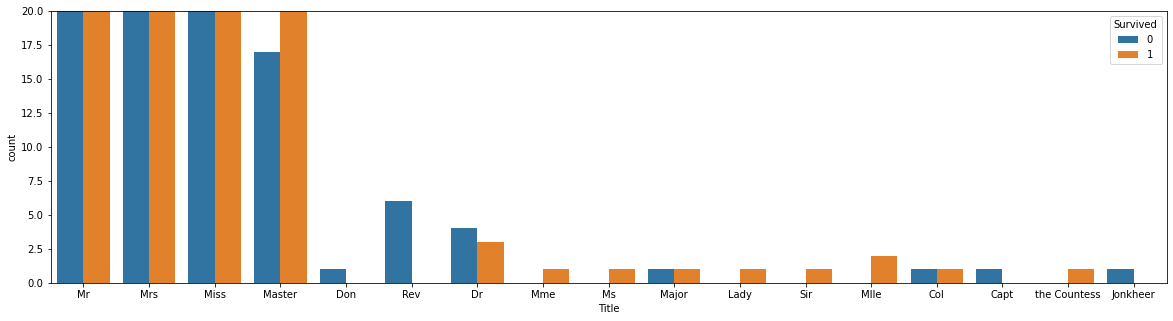

In [71]:
plt.figure(figsize=(20,5))
sns.countplot(data=train,x='Title',hue='Survived')
plt.ylim(0,20)#y축의 limit를 지정

- Mr,Mrs,Miss : 성별과 관련된 호칭이라 머신러닝 모델이 학습에 쓸 수 있을 거 같다.
- Master : 나이가 어린 남성을 부르는 호칭(나이 시각화에서 얻은 지식과 관련)
- 나머지 호칭 들은 인원수가 적고 종류가 많기 때문에 범주를 통합 시킬 필요가 있다.

In [72]:
#map 함수 사용하기
title_dic={
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Mme' : 'Miss',
    'Lady' : 'Miss',
    'Don' : 'Other',
    'Rev' : 'Other',
    'Dr' : 'Other',
    'Ms' : 'Miss',
    'Major' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other',
    'Capt' : 'Other',
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona':'Other'
}

In [73]:
train['Title2']=train['Title'].map(title_dic)

In [74]:
train['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [75]:
#테스트 데이터도 호칭을 줄여보자
#하지만 nan결측치가 등장-> train에 없는 호칭이 test에 존자
test['Title2']=test['Title'].map(title_dic)

In [76]:
test['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [77]:
test['Title'].unique() #'Dona':'Other'추가하자

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [78]:
test['Title2']=test['Title'].map(title_dic)

In [79]:
test['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

####  티켓정보는 사용하지 않겠다.

In [80]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title',
       'Title2'],
      dtype='object')

In [81]:
train.drop(['Name','Ticket','Title'],axis=1,inplace=True)

In [82]:
test.drop(['Name','Ticket','Title'],axis=1,inplace=True)

### 5.  모델링
- 인코딩(문자 데이터들을 숫자데이터로 싹 바꿔주는 것)
    1. label encoding
    2. one-hot encoding
- 모델 선택 및 하이퍼파라미터 조정
- 모델학습
- 모델평가

label encoding - 단순 수치값으로 mapping하는 작업
ex) map,loc,Label Encoder ->0,1,2 이런식으로 학습하는 거라 순서가 의도치않게 들어갈 수도 있다.
one-hot encoding - 0,1의 값을 가진 여러개의 새로운 특성으로 변경하는 작업
ex) 타이타닉의 embarked-> S,C,Q 세개의 특성 그렇다면 embarked_S, embarked_C, embarked_Q 이런식으로 콜롬 늘려버림

In [83]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_Size', 'Family_Group', 'Title2'],
      dtype='object')

In [84]:
categorical_features=['Sex','Cabin','Embarked','Family_Group','Title2']


In [85]:
pd.get_dummies(train['Title2'])#one-hot encoding 

,Master,Miss,Mr,Mrs,Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [86]:
for feature_name in categorical_features:
    one_hot=pd.get_dummies(train[feature_name],prefix=feature_name) #원핫인코딩
    train.drop(feature_name,axis=1,inplace=True) #기존 글자형태 컬럼 삭제
    train=pd.concat([train, one_hot],axis=1) #기존 데이터에 원핫데이터 붙이기

In [87]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,3,22.0,1,0,7.2500,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,2,1,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0


In [88]:
for feature_name in categorical_features:
    one_hot=pd.get_dummies(test[feature_name],prefix=feature_name) #원핫인코딩
    test.drop(feature_name,axis=1,inplace=True) #기존 글자형태 컬럼 삭제
    test=pd.concat([test, one_hot],axis=1) 

In [89]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,3,34.5,0,0,7.8292,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,3,47.0,1,0,7.0000,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,2,62.0,0,0,9.6875,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
4,3,22.0,1,1,12.2875,3,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [90]:
#train과 test의 컬럼명을 차집합 연산해보자.
set(train.columns) - set(test.columns)
#{'Survived','T'}결과 뜸 -> test데이터에 T라는 데이터 추가

{'Cabin_T', 'Survived'}

In [91]:
test['Cabin_T']=0

In [92]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other,Cabin_T
0,3,34.5,0,0,7.8292,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,3,47.0,1,0,7.0000,2,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,2,62.0,0,0,9.6875,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,27.0,0,0,8.6625,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
4,3,22.0,1,1,12.2875,3,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0


#### 문제와 정답으로 나누기

In [93]:
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']

In [94]:
X_train.shape, y_train.shape
#((891,28),(891,))

((891, 28), (891,))

In [95]:
X_test = test
# y_test는 Kaggle 사이트에 있다.

In [96]:
X_test.shape
#(418,28)

(418, 28)

#### 모델 선택 및 학습

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
knn_model=KNeighborsClassifier()
tree_model=DecisionTreeClassifier()

In [99]:
#knn은 따로 설정하지 않으면 기본값이 5로 설정
#decisiontree는 max_depth로 복잡도가 나뉨
#성능을 올리기 위해서 train데이터를 7:3으로 분류해보자

#### train,validation 분리

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train)

In [102]:
X_train.shape,y_train.shape

((668, 28), (668,))

In [103]:
X_val.shape,y_val.shape

((223, 28), (223,))

#### 모델 학습 및 평가

In [104]:
knn_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [105]:
knn_model.score(X_val,y_val)

0.7533632286995515

In [106]:
tree_model.score(X_val,y_val)

0.8251121076233184

#### 교차검증
- 현실적으로 많은 데이터를 얻기는 힘들다 따라서 일정 데이터를 나눠서 검증해보자

In [10]:
from sklearn.model_selection import cross_val_score

In [108]:
X_train=train.drop('Survived',axis=1)
y_train=train['Survived']

In [109]:
X_train.shape,y_train.shape

((891, 28), (891,))

In [110]:
cross_val_score(knn_model,X_train,y_train,cv=5)

array([0.68715084, 0.71348315, 0.73033708, 0.75842697, 0.74157303])

In [111]:
knn_result=cross_val_score(knn_model,X_train,y_train,cv=5)
knn_result

array([0.68715084, 0.71348315, 0.73033708, 0.75842697, 0.74157303])

In [112]:
knn_result.mean() #평균값

0.7261942125415856

In [113]:
cross_val_score(tree_model,X_train,y_train,cv=5)

array([0.76536313, 0.7752809 , 0.86516854, 0.74157303, 0.7752809 ])

In [114]:
tree_result=cross_val_score(tree_model,X_train,y_train,cv=5)
tree_result

array([0.7877095 , 0.7752809 , 0.84831461, 0.73595506, 0.78651685])

In [115]:
tree_result.mean()

0.7867553825874082

#### 하이퍼파라미터 튜닝

In [116]:
score_list=[]
for k in range(1,150) : #이웃이 작으면 복잡 크면 단순
    knn_model= KNeighborsClassifier(n_neighbors=k)
    knn_result=cross_val_score(knn_model,X_train,y_train,cv=5)
    score_list.append(knn_result.mean())
    #knn은 다른거랑 비교해보면 속도가 느린편
    #knn의 k는 가급적이면 홀수로 고르는게 좋다.

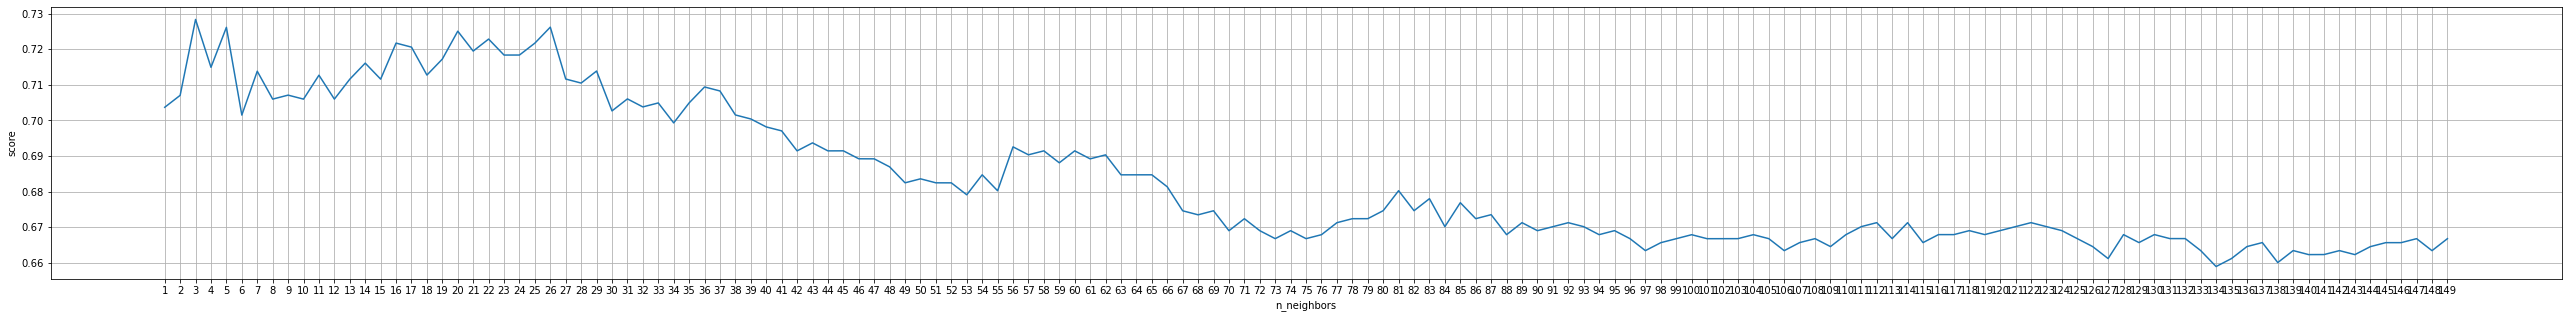

In [117]:
plt.figure(figsize=(45,5))
plt.plot(range(1,150),score_list)
plt.xticks(range(1,150))
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

- KNN은 최적의 이웃이 3이다.

In [118]:
score_tree_list=[]
for k in range(1,150) : #질문이라 최대 갯수를 예측이 안된다.
    tree_model=DecisionTreeClassifier(max_depth=k)
    tree_result=cross_val_score(tree_model,X_train,y_train,cv=5)
    score_tree_list.append(tree_result.mean())

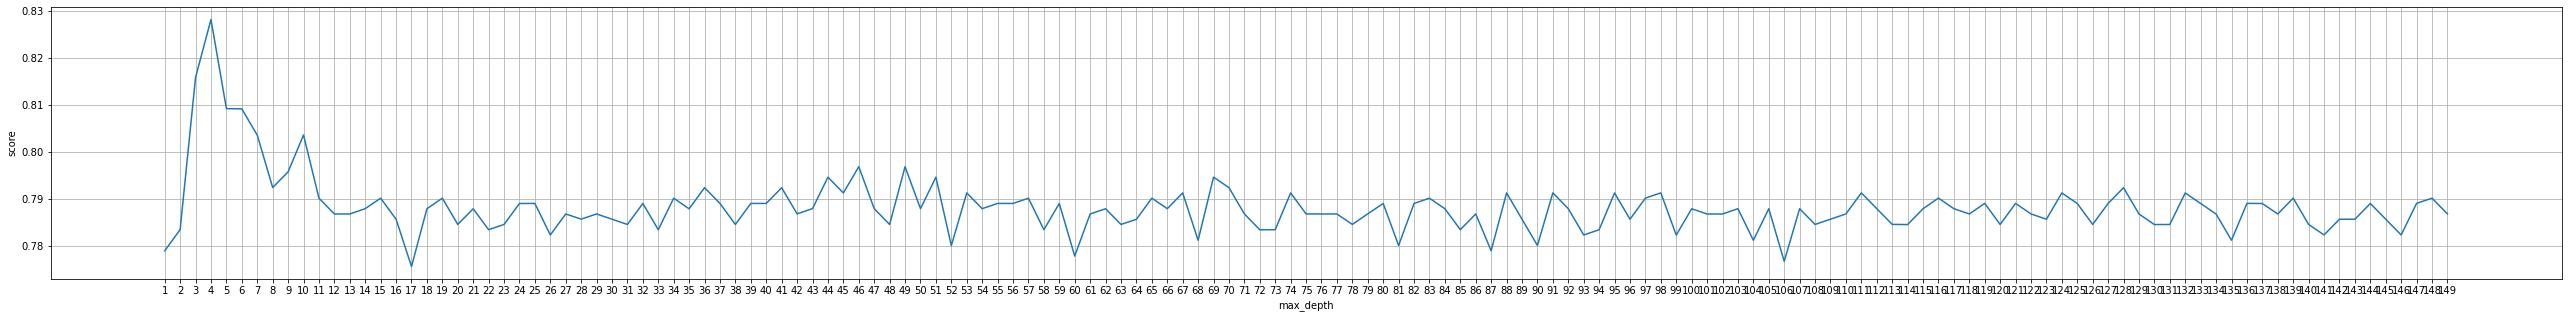

In [119]:
plt.figure(figsize=(45,5))
plt.plot(range(1,150),score_tree_list)
plt.xticks(range(1,150))
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

- tree의 최대 깊이는 4정도가 좋다.

#### 최종 모델 평가

In [120]:
final_knn=KNeighborsClassifier(n_neighbors=3)
final_knn.fit(X_train,y_train)

final_tree= DecisionTreeClassifier(max_depth=4)
final_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [121]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [122]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other', 'Cabin_T'],
      dtype='object')

In [123]:
#'T' 컬럼의 위치가 달라서 그냥 넣으면 상당히 낮은 결과가 나올 수 있음
X_test=X_test[X_train.columns]

In [124]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [125]:
knn_pre=final_knn.predict(X_test)
tree_pre=final_tree.predict(X_test)

In [126]:
knn_pre

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [127]:
tree_pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [128]:
submission= pd.read_csv('./gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [129]:
submission['Survived']=tree_pre

In [130]:
submission.to_csv('PSJsubmission01.csv', index=False)
#index=False안하면 index들도 컬럼으로 추가해서 저장하기 때문에

#### 성능개선을 위해 고려해볼 사항

1. feature selection(특성선택)
2. 데이터 확보
3. 전처리작업 변경(결측치,특성공학,스케일링(단위맞추기) 등)
4. 모델 변경 - 앙상블(여러 모델로 의견 종합해서 개선안 제시)

In [16]:
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [17]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test)

In [18]:
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [20]:
df_final=train1.iloc[:,[0,1,2,6,7]]
df_final

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0.0,3,1,0
1,2,1.0,1,1,0
2,3,1.0,3,0,0
3,4,1.0,1,1,0
4,5,0.0,3,0,0
...,...,...,...,...,...
413,1305,NaN,3,0,0
414,1306,NaN,1,0,0
415,1307,NaN,3,0,0
416,1308,NaN,3,0,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_val,y_train,y_val = train_test_split(df_final.iloc[:,1:],df_final.iloc[:,0])

In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.score(X_val,y_val)

In [ ]:
df_final_minmax = df_final.iloc[:,1:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(df_final_minmax)
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_train_scaled